In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
X_train = pd.read_csv('./data/omit_train_deps.csv', encoding='utf8')
X_test = pd.read_csv('./data/omit_test_deps.csv', encoding='utf8')
y_train = pd.read_csv('./data/omit_train_indeps.csv', encoding='utf8')
y_test = pd.read_csv('./data/omit_test_indeps.csv', encoding='utf8')

In [4]:
print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(3302, 196)
(3302, 2)
(1693, 196)
(1693, 2)


In [9]:
X = X_train.append(X_test)
X = X.drop('Unnamed: 0', axis=1)
y = y_train.append(y_test)
y = y.drop('Unnamed: 0', axis=1)

In [10]:
print X.shape
print y.shape

(4995, 195)
(4995, 1)


In [12]:
X.describe()

,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,host_acceptance_rate,host_response_rate,host_has_profile_pic,host_identity_verified,...,amenities_smartlock,amenities_smokedetector,amenities_smokingallowed,amenities_suitableforevents,amenities_translationmissingenhostingamenity,amenities_tv,amenities_washer,amenities_wheelchairaccessible,amenities_wifi,amenities_wirelessinternet
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,3302.000000,3302.000000,...,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,0.181507,0.112833,0.051828,0.221455,0.142991,0.010052,0.966951,0.926144,0.999697,0.999697,...,0.010210,0.774975,0.043243,0.043844,0.264665,0.676076,0.527327,0.033634,0.181782,0.937337
std,0.151535,0.070081,0.094759,0.125919,0.107164,0.035980,0.110217,0.158263,0.017402,0.017402,...,0.100538,0.417641,0.203425,0.204768,0.441199,0.468018,0.499303,0.180302,0.385703,0.242379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.100000,0.000000,0.150000,0.090909,0.001175,1.000000,0.920000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.125000,0.100000,0.000000,0.233333,0.090909,0.002350,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.187500,0.100000,0.090909,0.233333,0.125000,0.008226,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


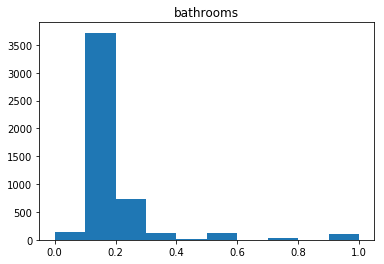

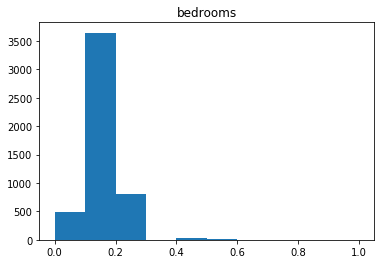

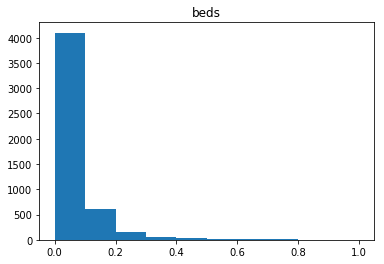

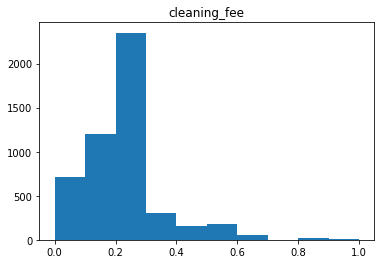

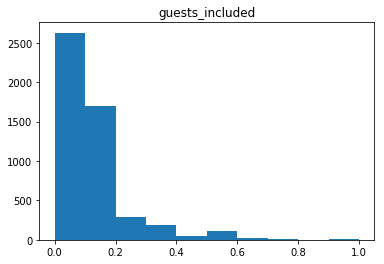

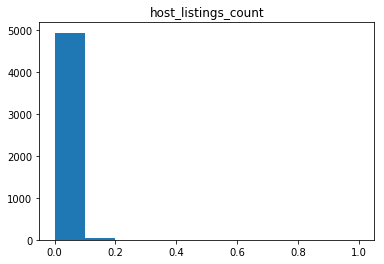

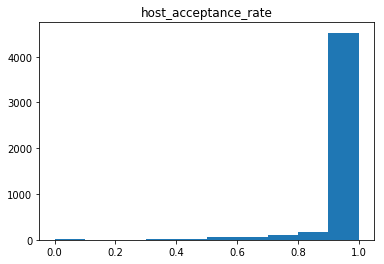

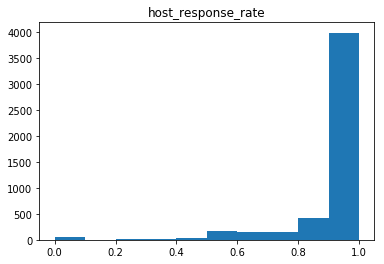

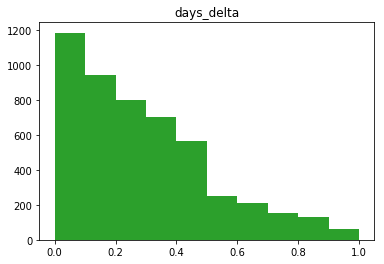

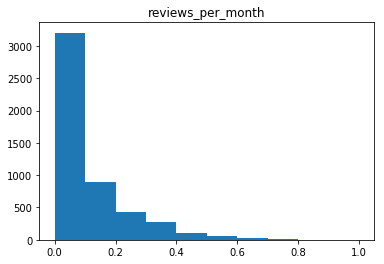

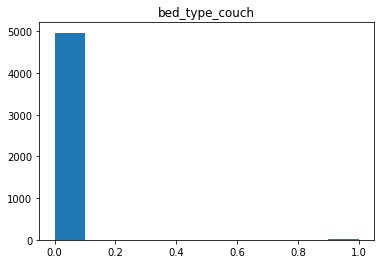

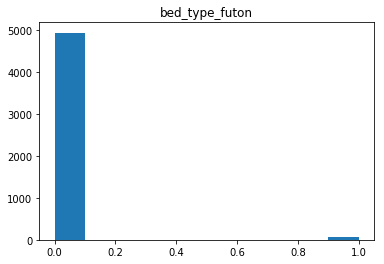

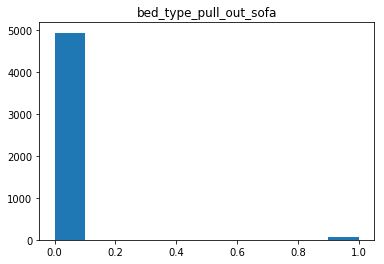

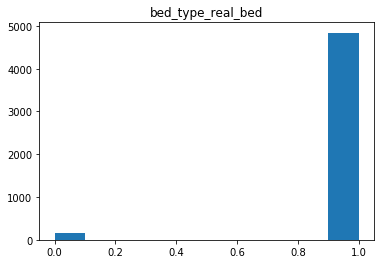

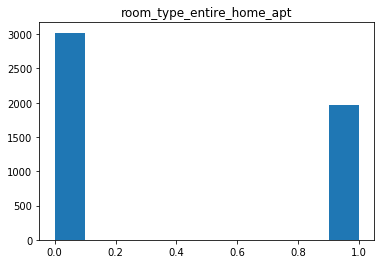

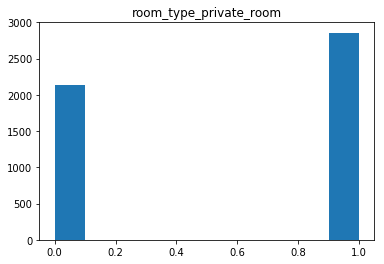

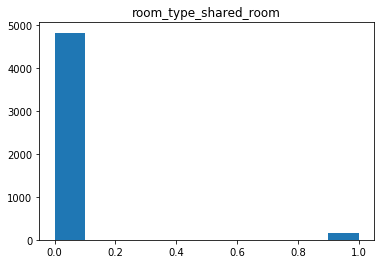

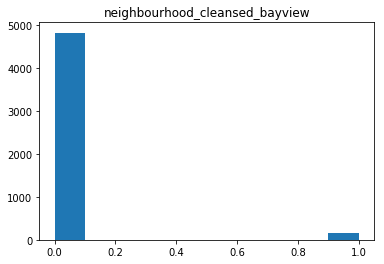

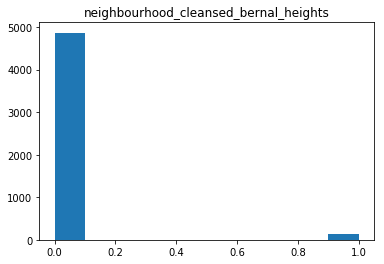

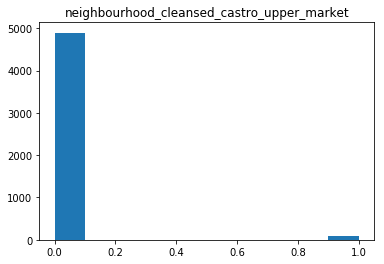

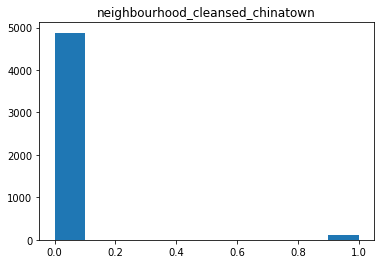

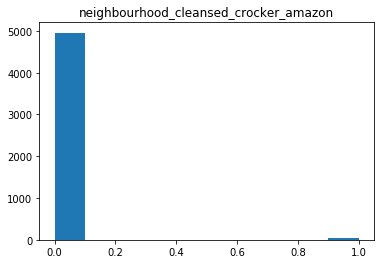

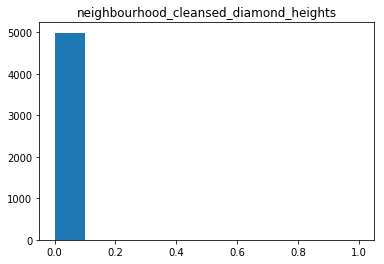

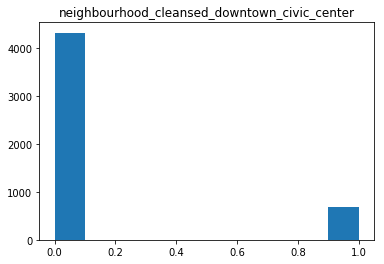

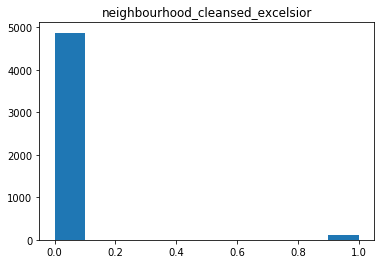

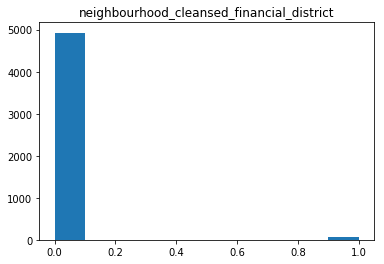

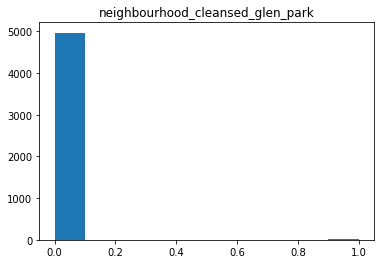

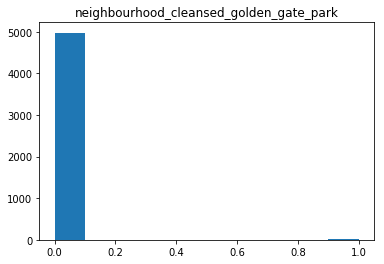

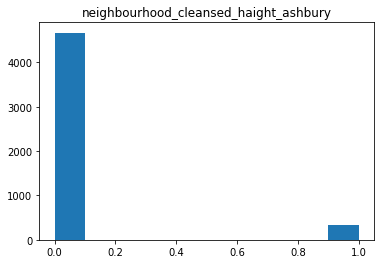

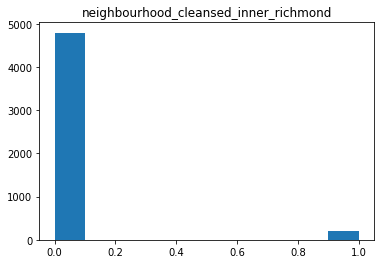

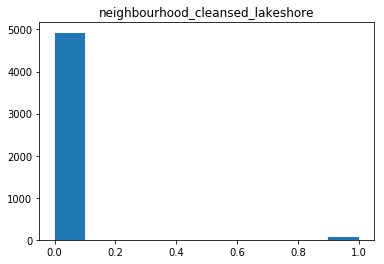

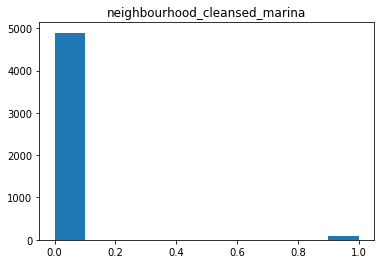

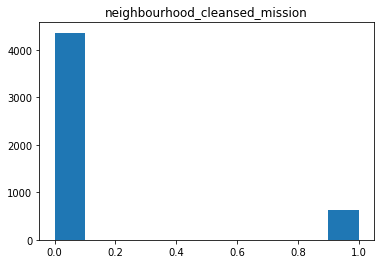

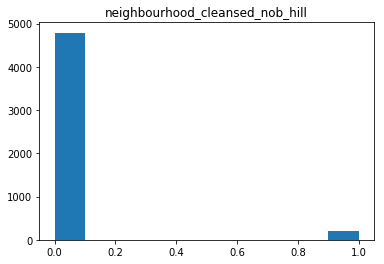

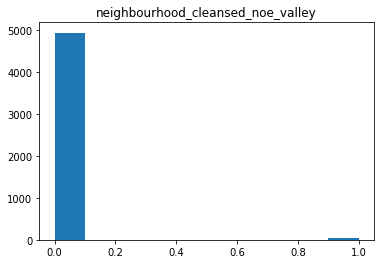

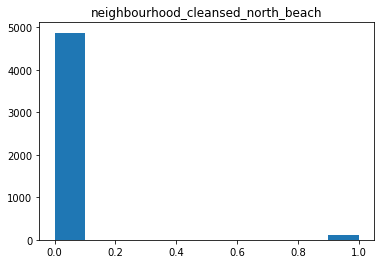

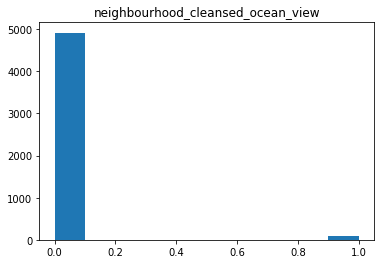

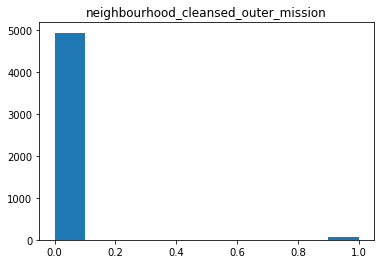

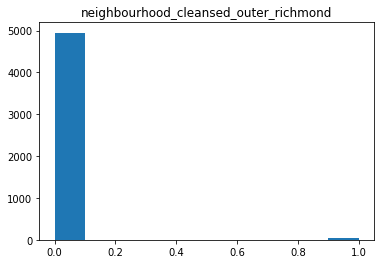

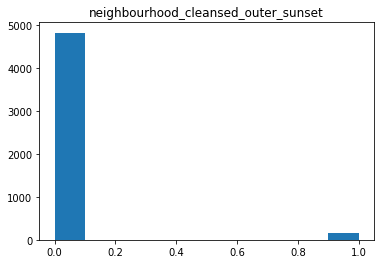

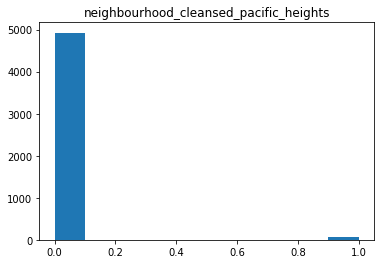

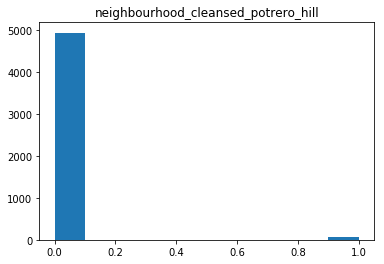

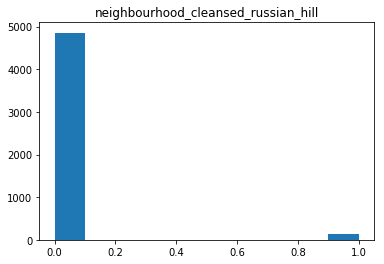

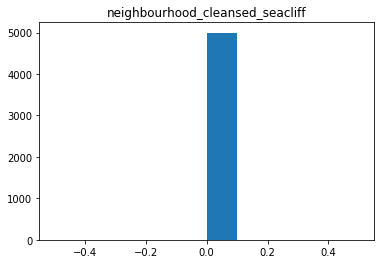

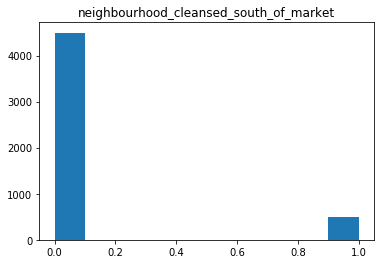

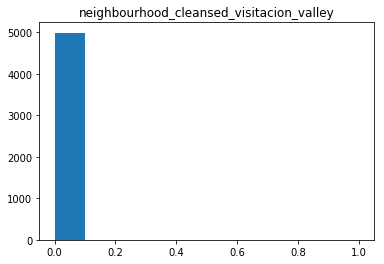

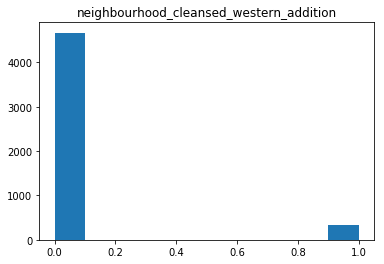

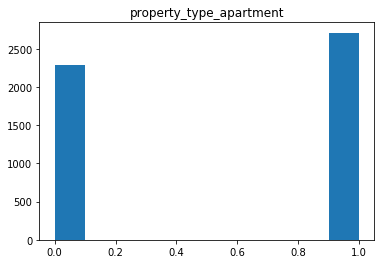

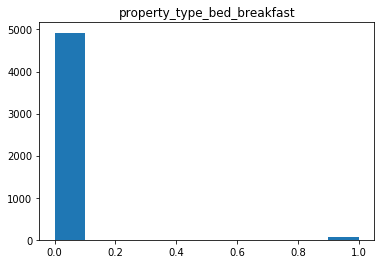

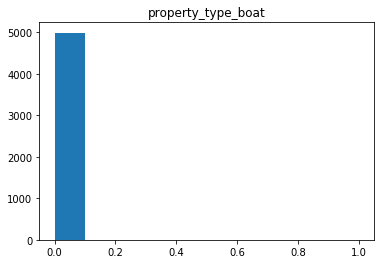

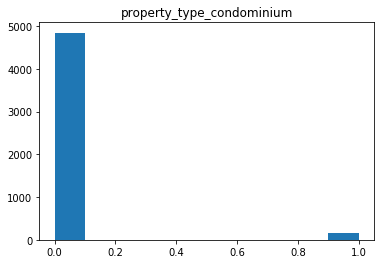

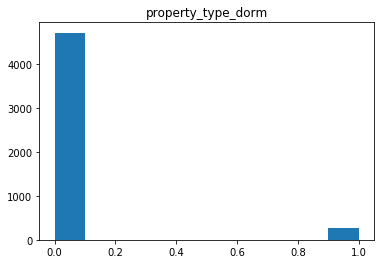

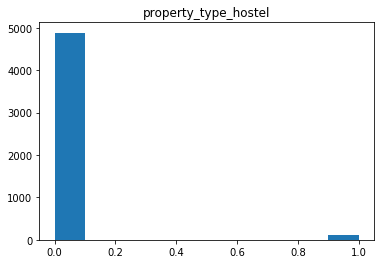

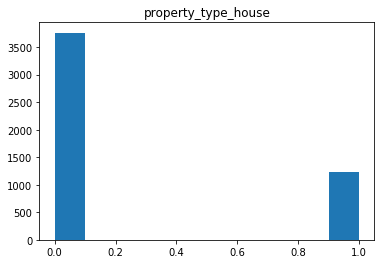

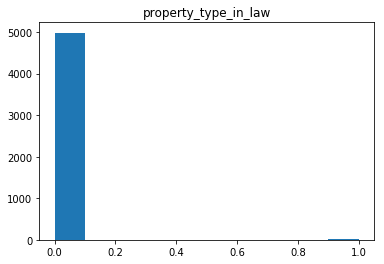

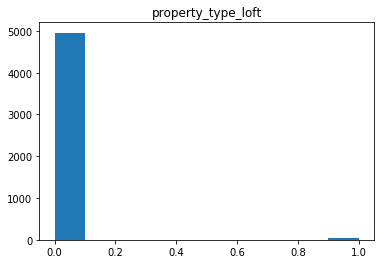

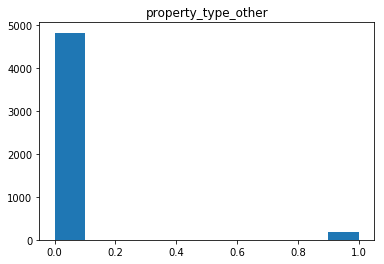

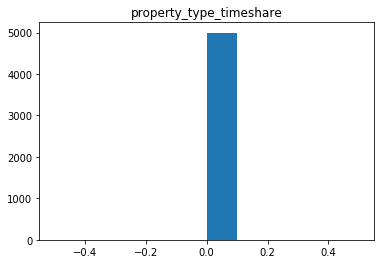

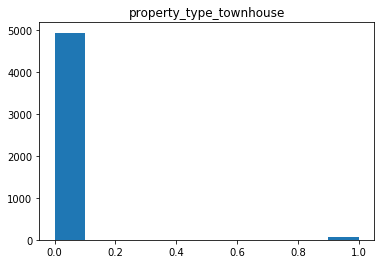

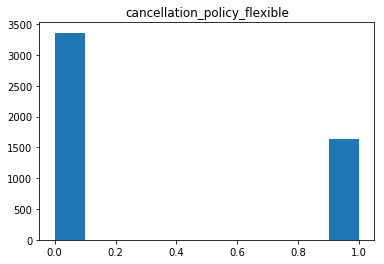

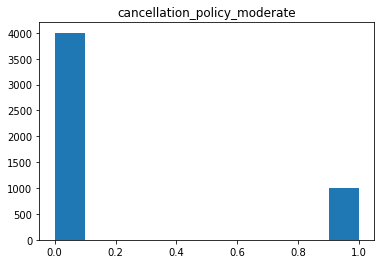

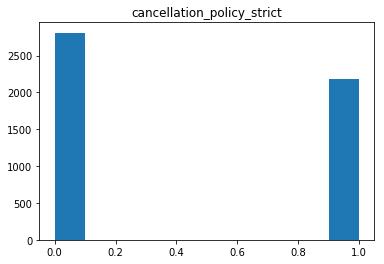

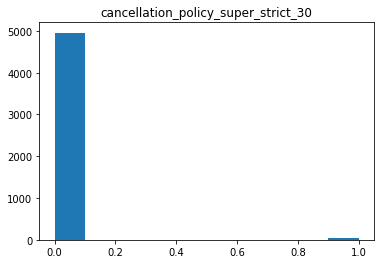

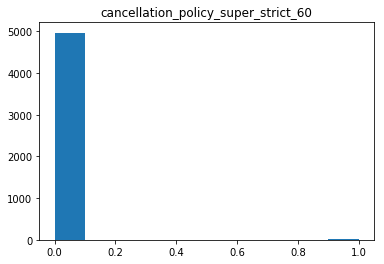

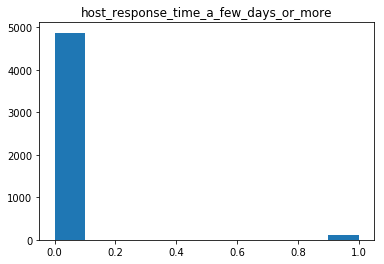

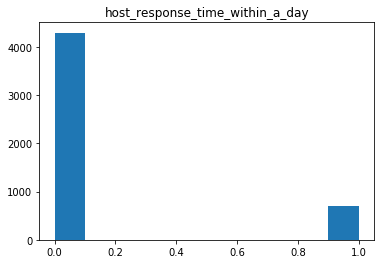

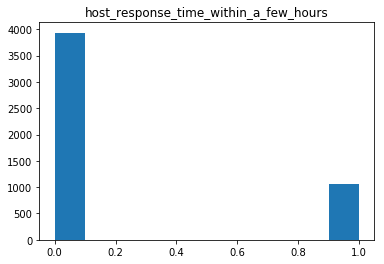

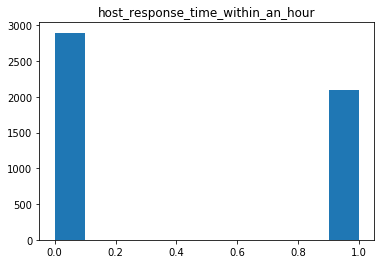

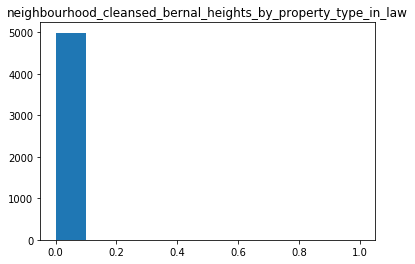

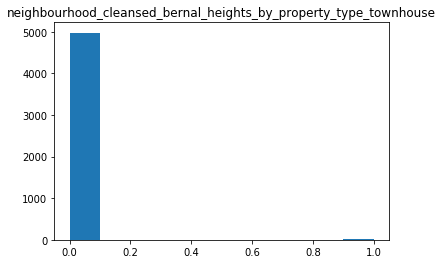

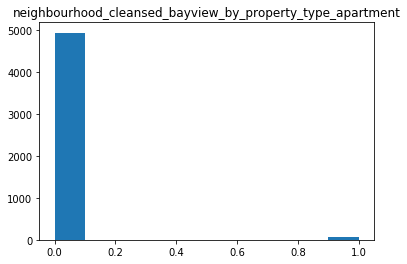

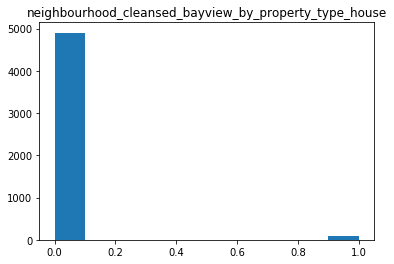

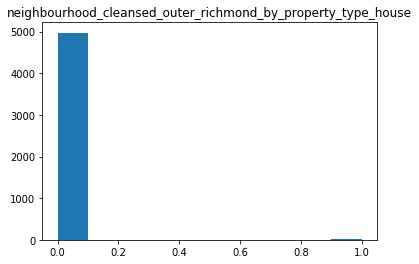

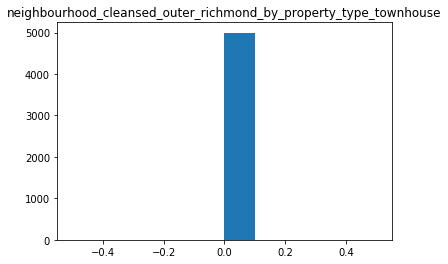

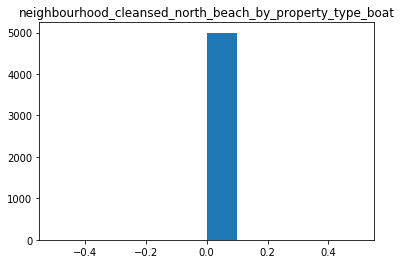

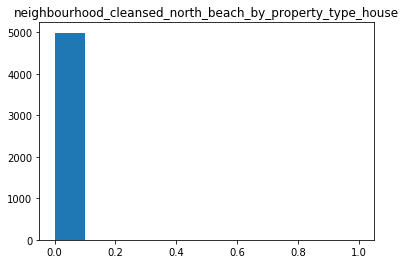

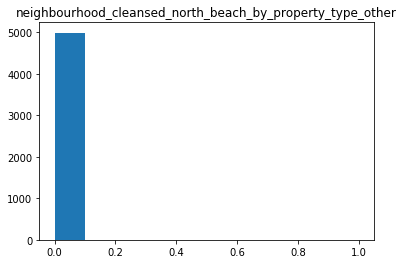

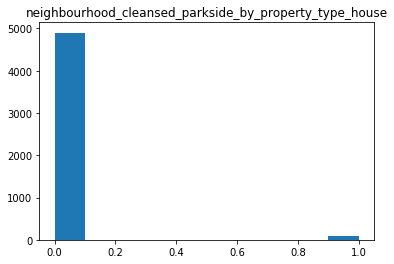

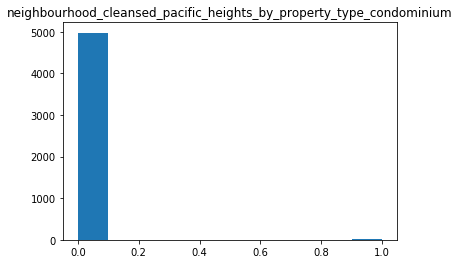

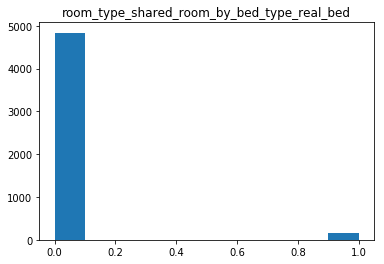

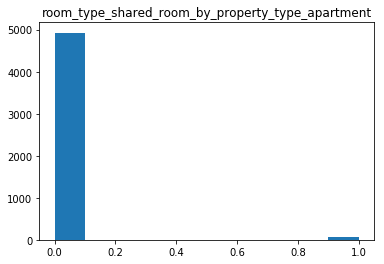

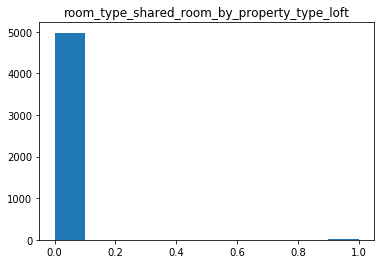

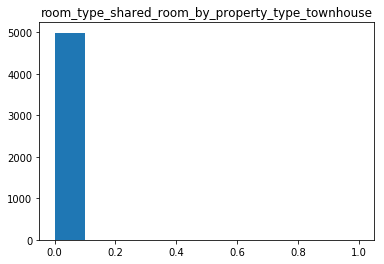

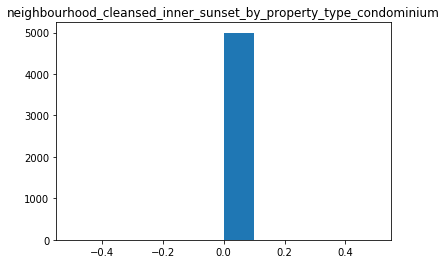

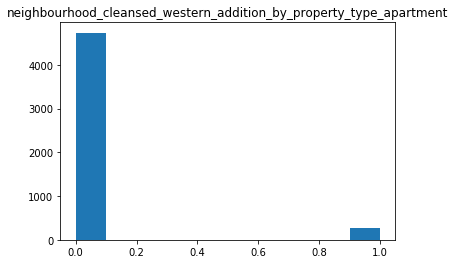

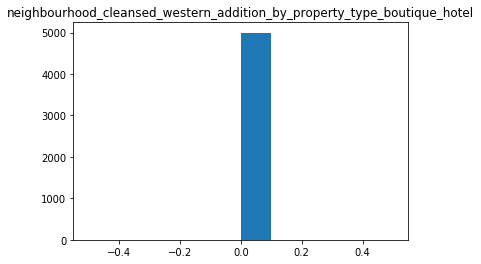

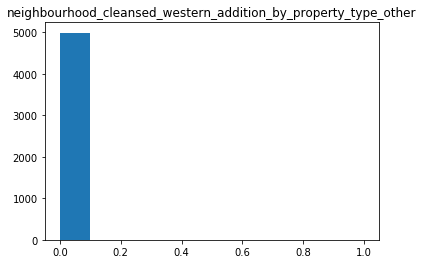

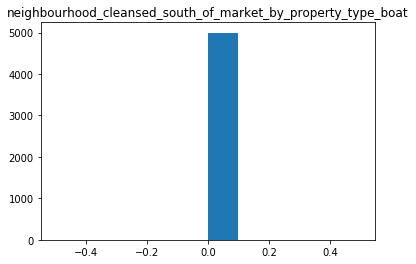

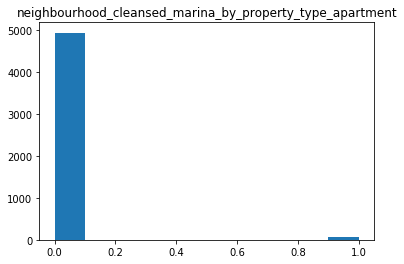

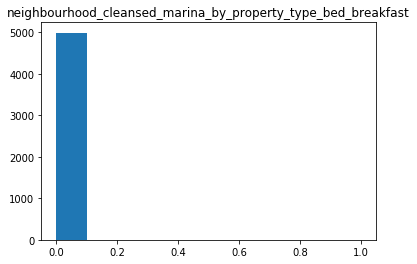

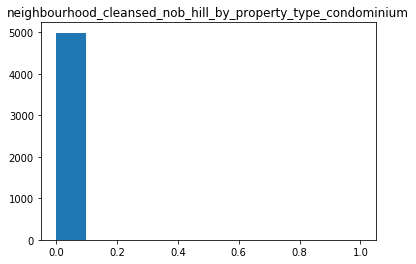

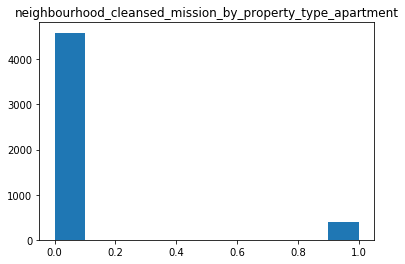

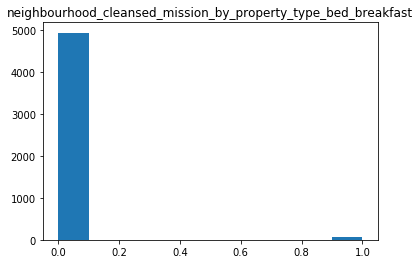

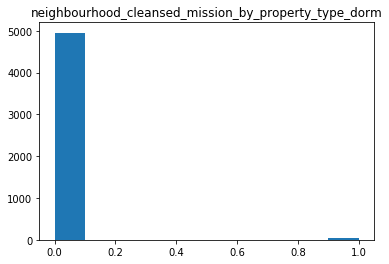

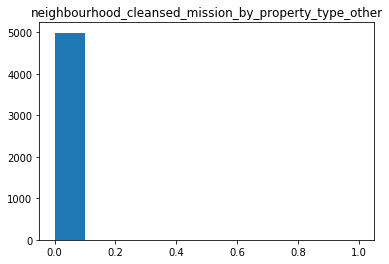

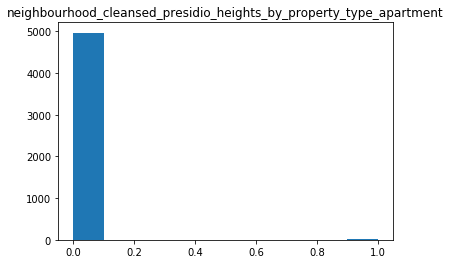

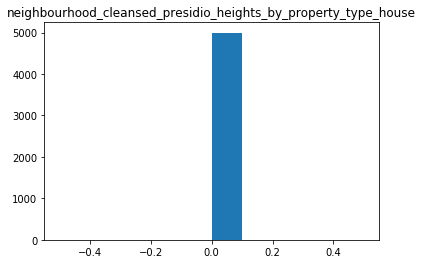

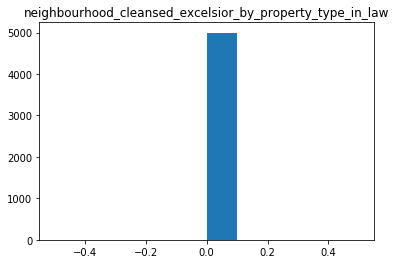

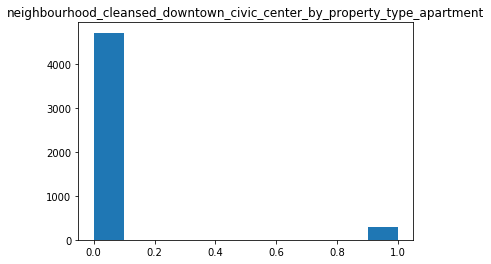

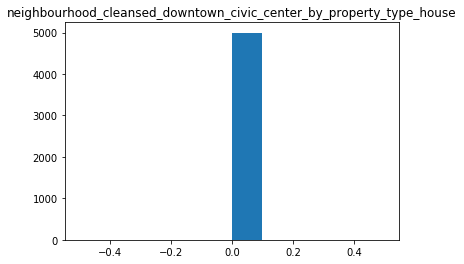

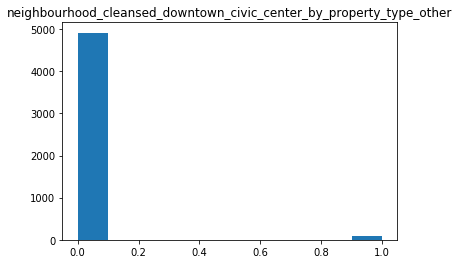

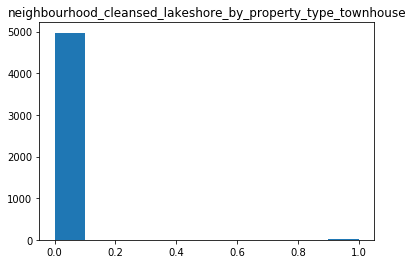

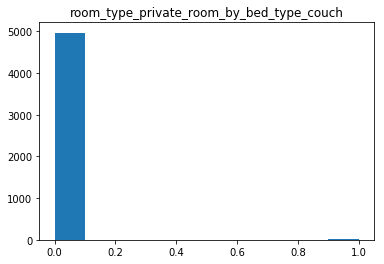

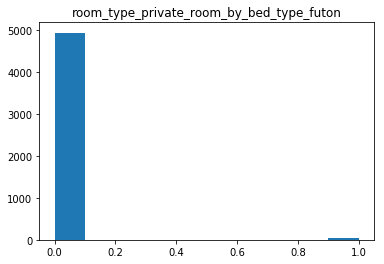

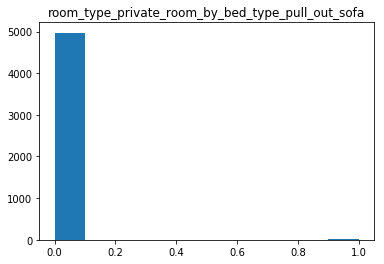

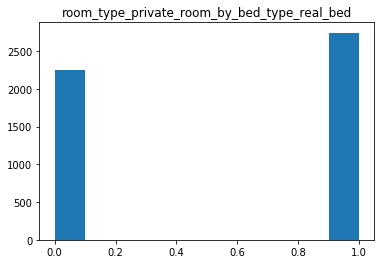

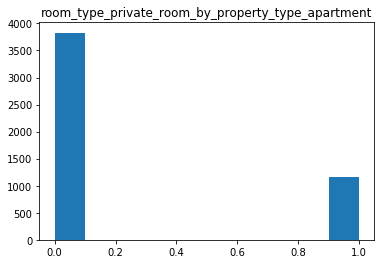

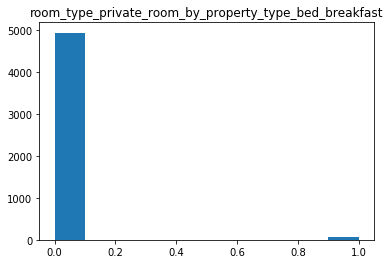

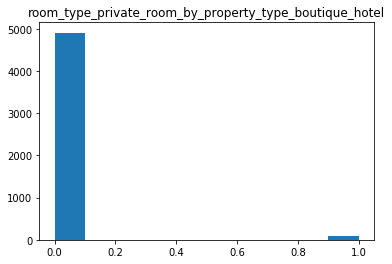

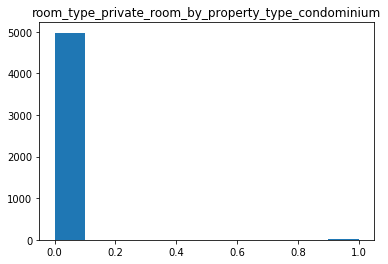

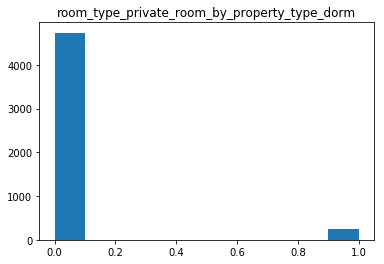

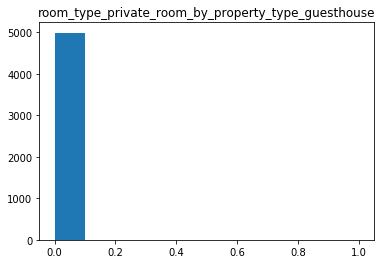

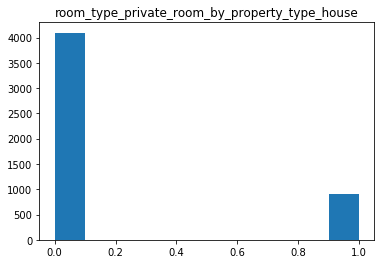

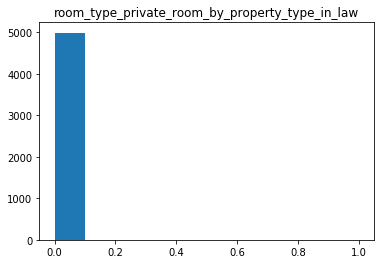

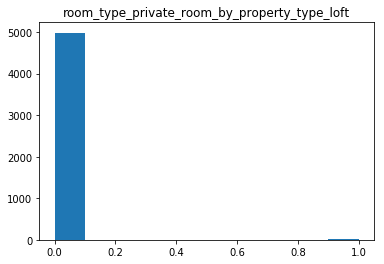

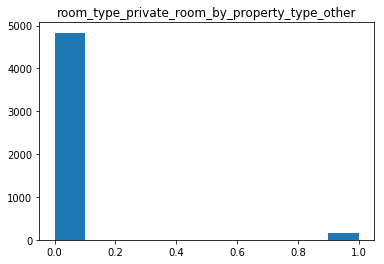

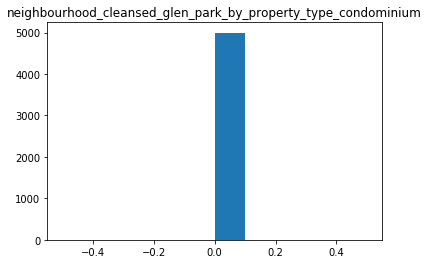

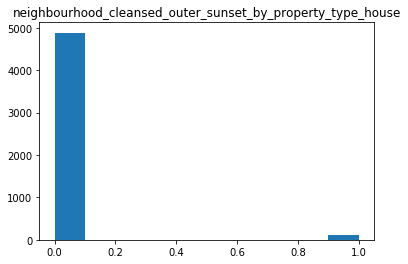

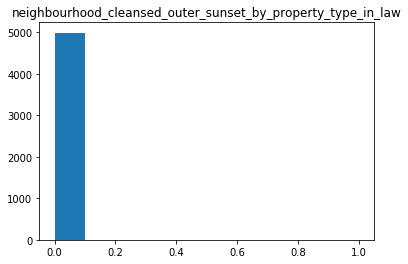

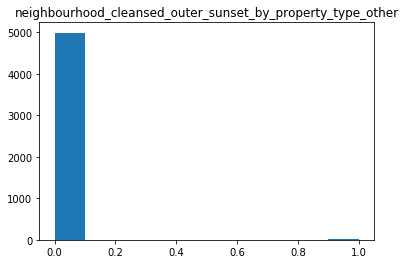

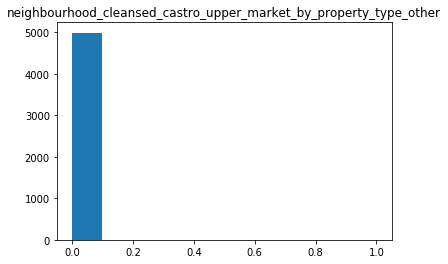

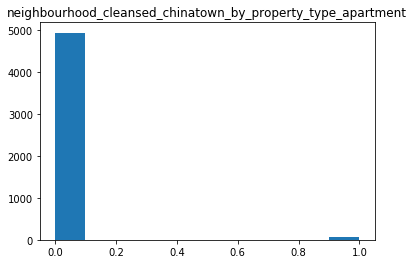

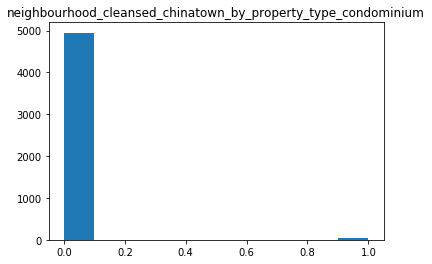

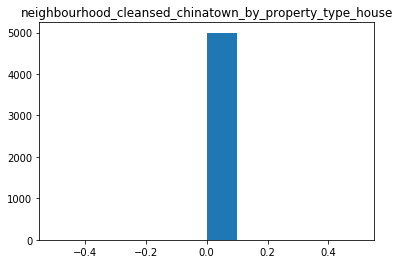

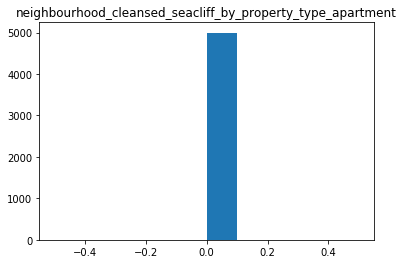

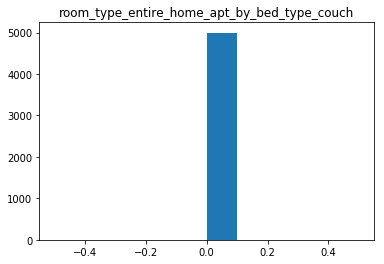

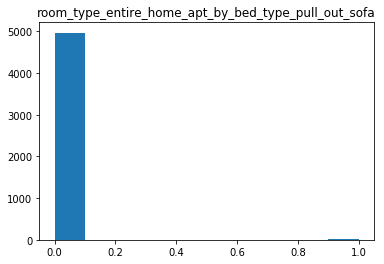

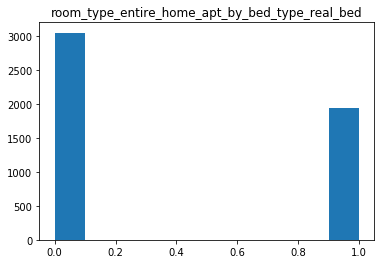

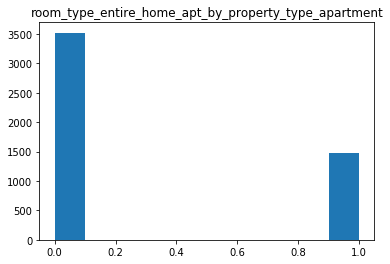

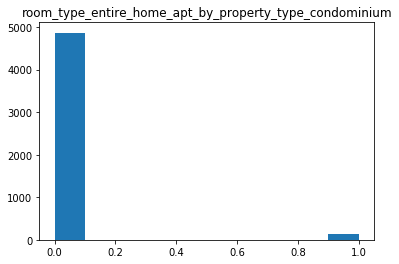

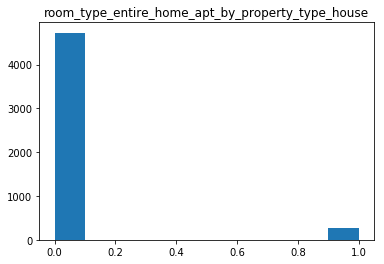

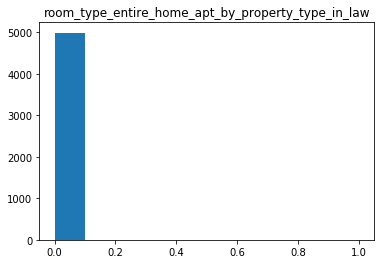

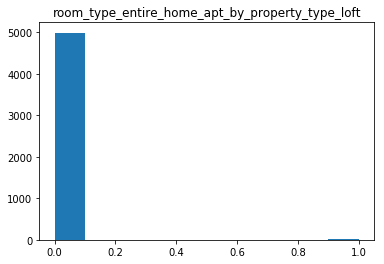

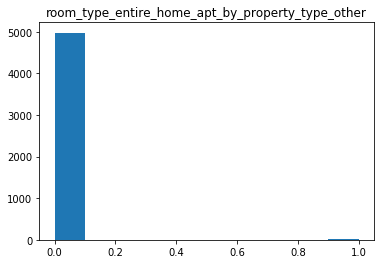

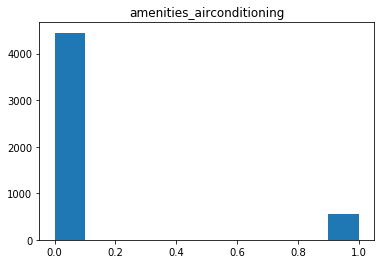

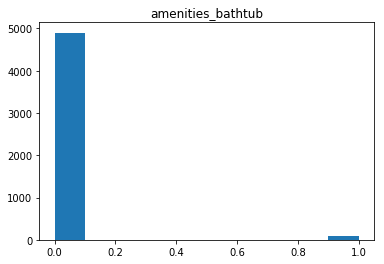

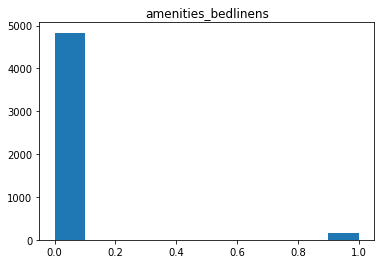

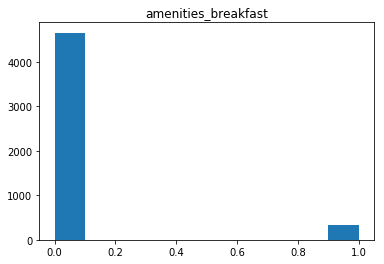

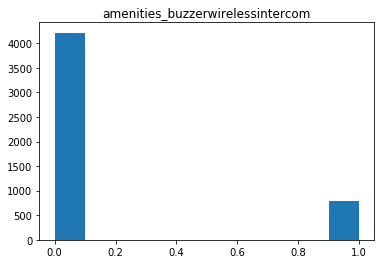

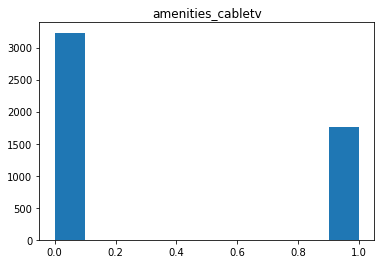

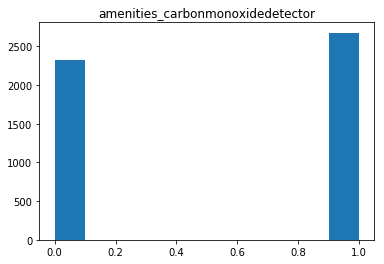

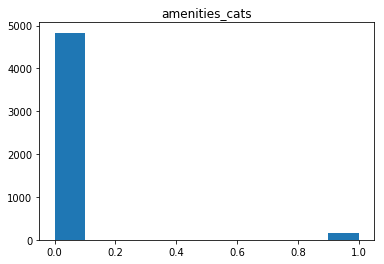

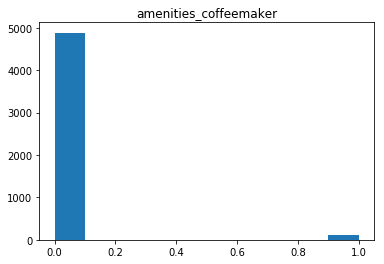

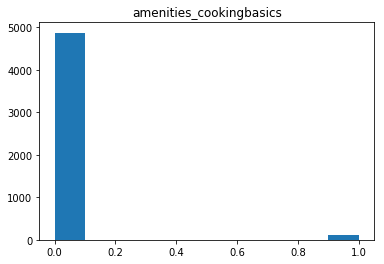

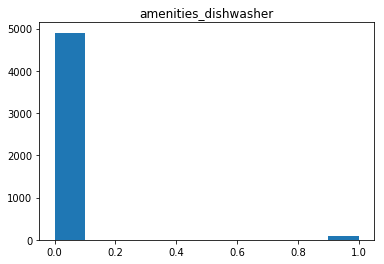

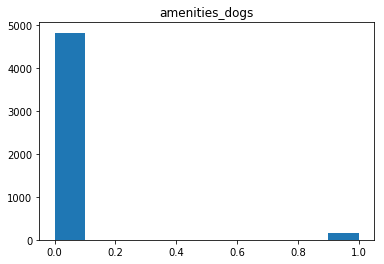

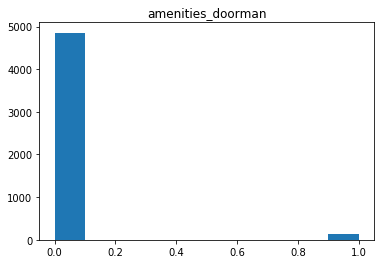

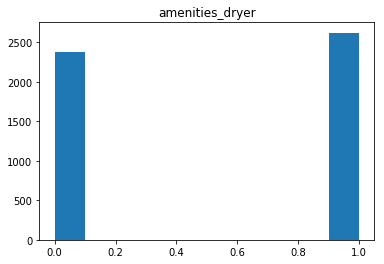

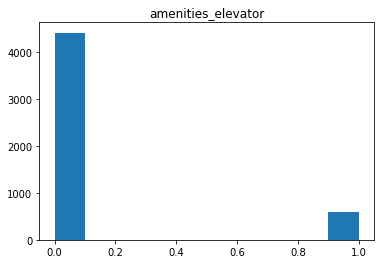

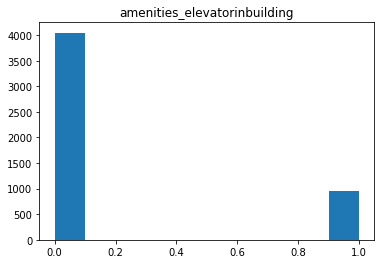

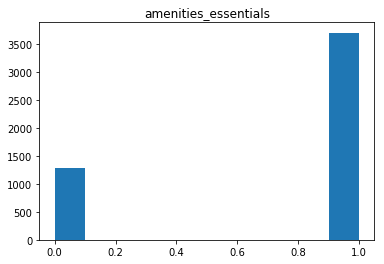

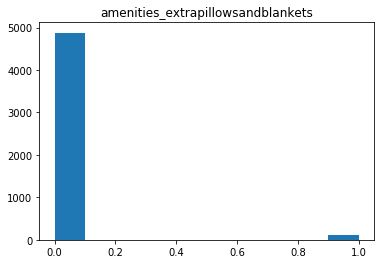

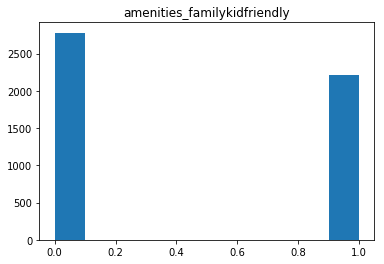

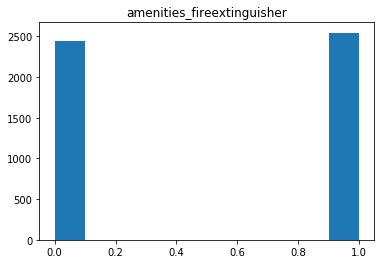

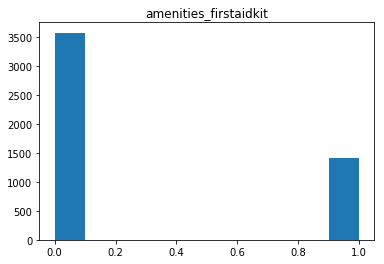

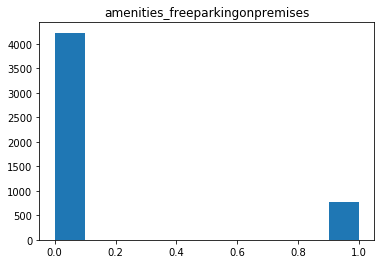

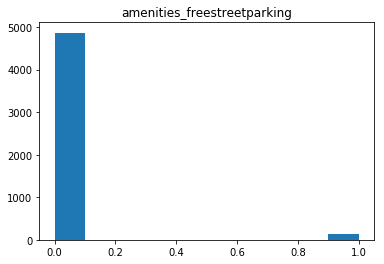

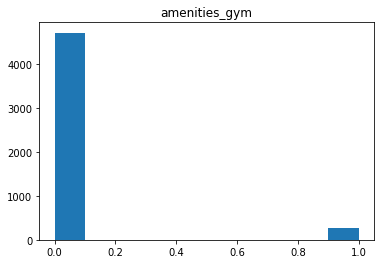

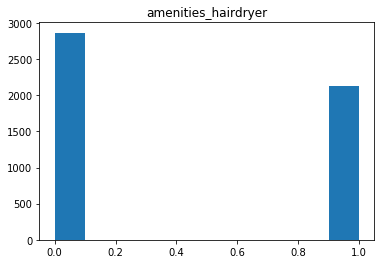

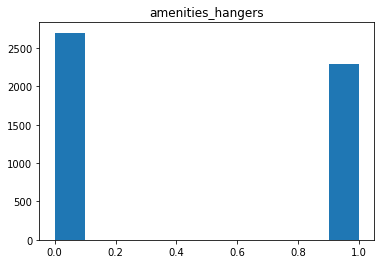

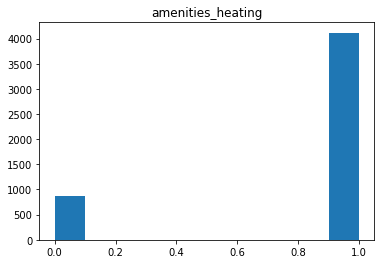

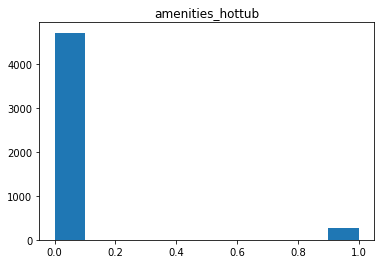

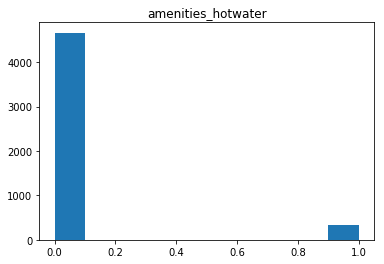

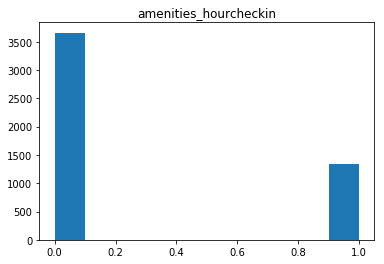

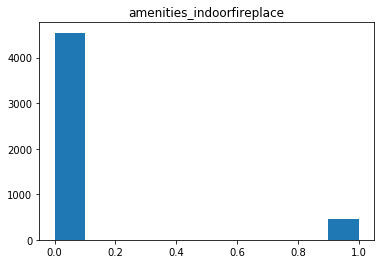

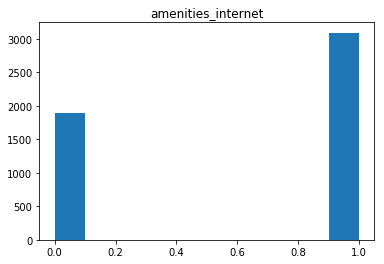

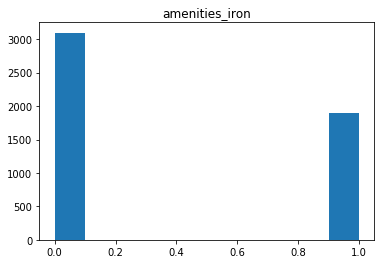

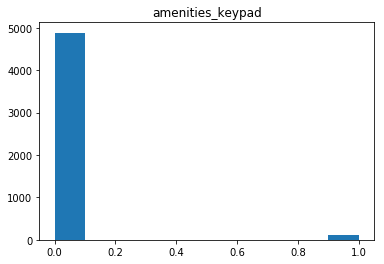

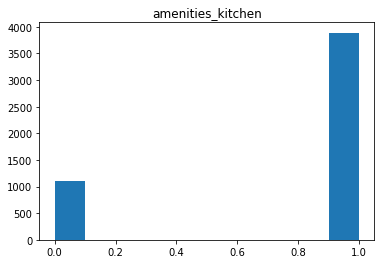

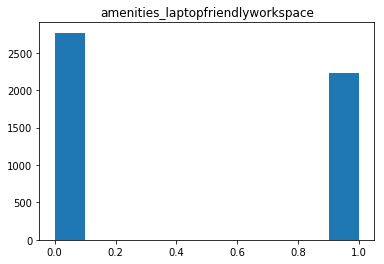

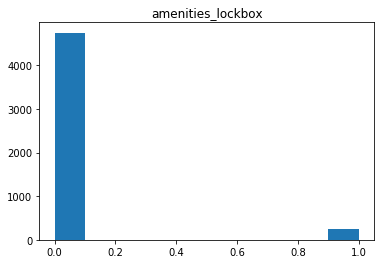

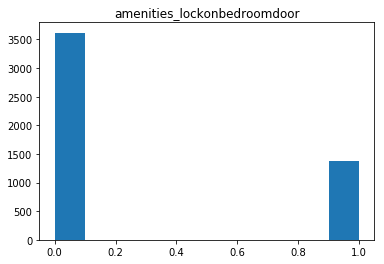

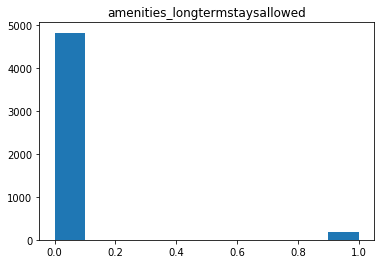

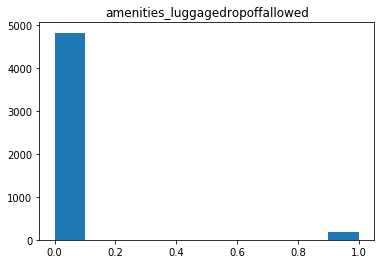

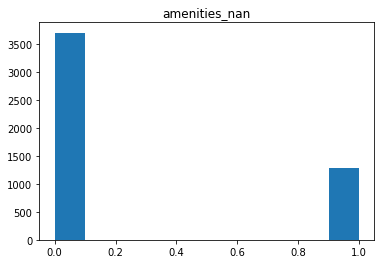

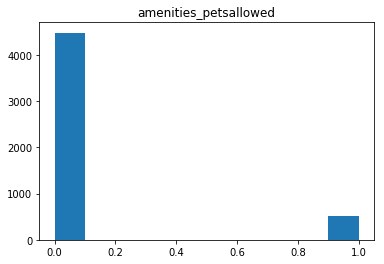

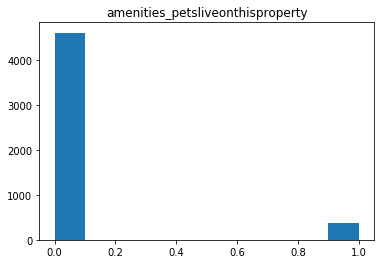

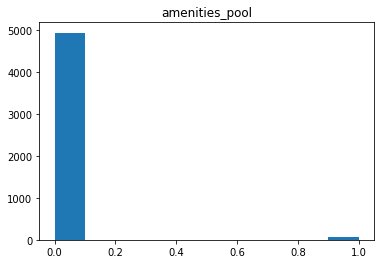

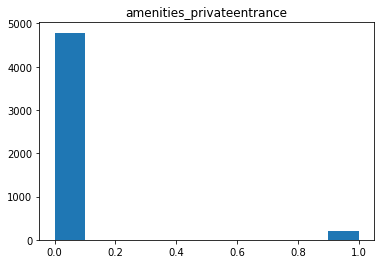

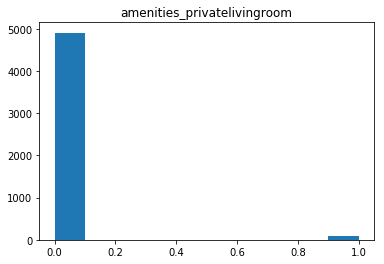

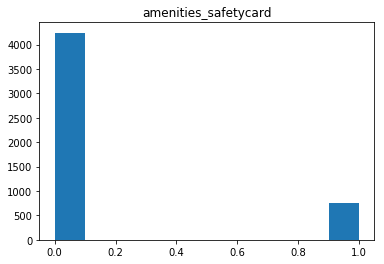

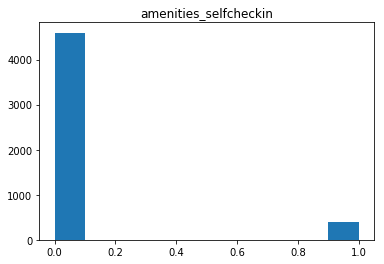

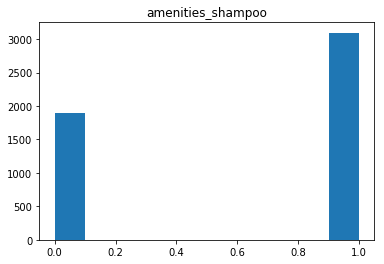

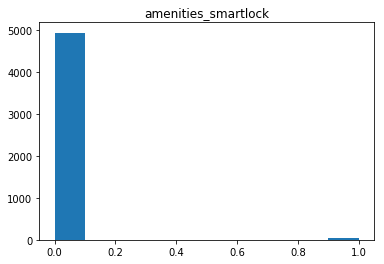

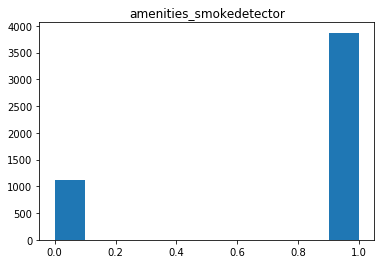

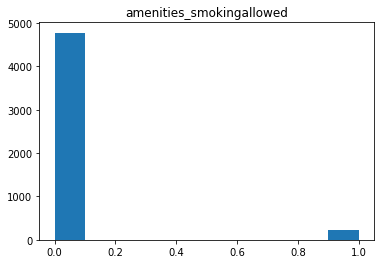

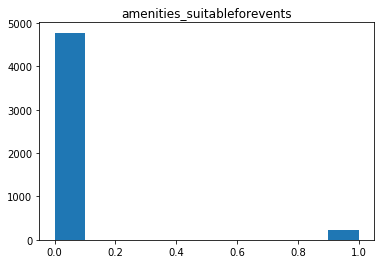

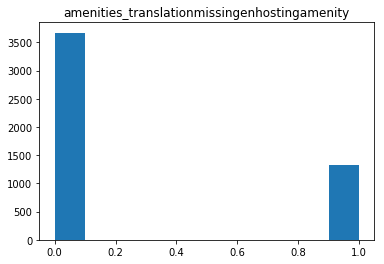

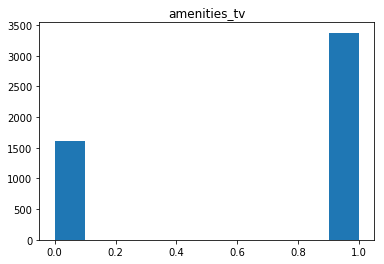

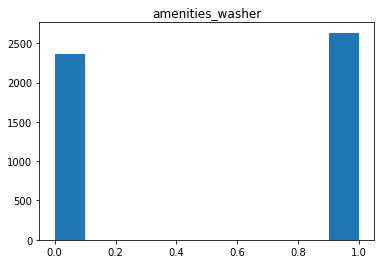

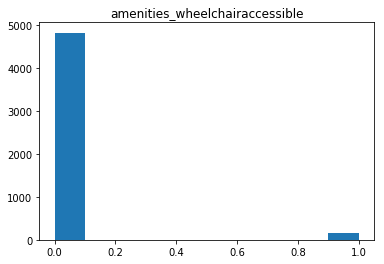

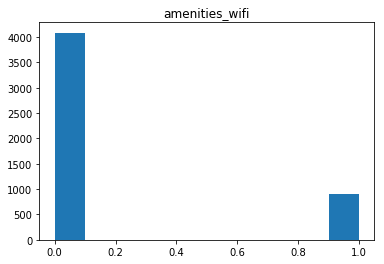

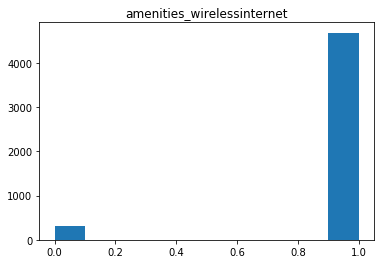

In [17]:
for c in X.columns:
    try:
        plt.hist(X[c])
    except Exception as e:
        pass
    else:
        plt.title(c)
        plt.show()